In [1]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

# Data

In [2]:
T = 7*24*12

p = [
-0.000800,
0.001000,
0.001000,
0.001000,
0.001000,
0.001000,
0.001000,
0.001000,
0.001000,
0.001000,
-0.000421,
-0.000421,
0.001000,
0.001000,
0.001000,
-0.000895,
0.000053,
0.001000,
0.001000,
0.001000,
0.001000,
0.001000,
0.001000,
0.001000,
0.001000,
0.001000,
0.001000,
0.001200,
0.002789,
0.001316,
0.002579,
0.001000,
0.001000,
0.001700,
0.002300,
0.001000,
0.001000,
0.001000,
0.001000,
0.002158,
0.001800,
0.001000,
0.002263,
0.003000,
0.001526,
0.002579,
0.001316,
0.002700,
0.001300,
0.001000,
0.001000,
0.001000,
0.001053,
0.001800,
0.000000,
-0.000105,
-0.001632,
0.000474,
0.044947,
0.152105,
0.346800,
0.807400,
1.982895,
4.412004,
4.215500,
4.554770,
14.967692,
19.170000,
23.110001,
25.836000,
29.260000,
31.280001,
45.540001,
50.776665,
62.610001,
79.110001,
89.300003,
116.400002,
137.600006,
160.800003,
185.199997,
217.500000,
239.199997,
275.500000,
308.349976,
342.200012,
375.500000,
405.600006,
445.600006,
478.899994,
519.599976,
553.599976,
589.099976,
624.799988,
660.200012,
698.300049,
733.000000,
767.700012,
797.799988,
829.000000,
853.000000,
894.000000,
921.000000,
956.000000,
988.000000,
1005.000000,
1048.000000,
1077.000000,
1118.000000,
1135.000000,
1160.000000,
1187.000000,
1225.000000,
1236.000000,
1248.000000,
1278.000000,
1322.000000,
1332.000000,
1355.000000,
1373.000000,
1399.000000,
1414.000000,
1425.000000,
1457.000000,
1475.000000,
1483.000000,
1500.000000,
1542.000000,
1531.000000,
1542.500000,
1559.000000,
1563.000000,
1593.000000,
1585.000000,
1598.000000,
1608.000000,
1611.000000,
1614.000000,
1631.000000,
1636.333374,
1635.000000,
1638.000000,
1644.000000,
1620.000000,
1654.000000,
1674.000000,
1664.000000,
1648.000000,
1662.000000,
1663.000000,
1637.000000,
1644.333374,
1634.000000,
1625.000000,
1636.000000,
1588.000000,
1613.000000,
1598.000000,
1618.000000,
1585.000000,
1576.000000,
1555.000000,
1546.000000,
1539.000000,
1515.000000,
1487.000000,
1502.000000,
1464.000000,
1454.000000,
1449.000000,
1427.000000,
1420.000000,
1382.000000,
1365.000000,
1357.000000,
1319.000000,
1302.000000,
1269.000000,
1250.000000,
1221.000000,
1195.666626,
1165.000000,
1147.000000,
1124.000000,
1094.000000,
1049.000000,
1023.000000,
1011.000000,
978.000000,
946.000000,
923.000000,
878.000000,
860.000000,
818.000000,
781.000000,
746.599976,
720.200012,
684.000000,
642.700012,
616.099976,
569.799988,
540.966675,
504.600006,
473.299988,
435.100006,
403.200012,
372.700012,
342.000000,
306.700012,
276.899994,
240.300003,
214.399994,
185.750000,
160.199997,
131.300003,
115.900002,
88.449997,
82.300003,
65.503334,
54.299999,
46.070000,
41.105000,
37.474998,
32.459995,
26.070000,
23.120001,
20.590000,
17.717501,
14.550000,
11.650000,
5.252000,
5.313000,
4.189167,
0.512800,
0.239200,
0.141632,
0.072684,
0.027263,
0.010200,
0.002000,
-0.000632,
-0.001000,
-0.002474,
-0.001421,
-0.001000,
-0.001000,
-0.001000,
0.000789,
-0.000895,
0.001000,
-0.001000,
-0.001000,
-0.001000,
-0.001000,
-0.000684,
0.000368,
-0.001211,
0.001000,
0.001000,
0.001000,
0.001000,
0.001000,
0.001000,
0.001000,
0.001000,
0.001000,
0.001000,
0.002263,
0.001632,
0.001000,
0.002579,
0.001316,
0.001000,
0.001000,
0.001000,
0.001000,
0.003000,
0.001105,
0.002800,
0.001000,
0.001211,
0.003000,
0.002579,
0.001526,
0.002368,
0.001000,
0.001700,
0.002263,
0.001842,
0.002053,
0.001000,
0.002158,
0.001800,
0.001000,
0.002263,
0.001632,
0.001000,
0.001000,
0.001000,
0.001000,
0.002700,
0.001211,
0.002895,
0.001000,
0.003000,
0.002800,
0.001200,
0.003000,
0.003000,
0.003000,
0.002474,
0.001632,
0.003000,
0.003000,
0.002263,
0.001842,
0.003000,
0.004053,
0.003842,
0.003000,
0.003000,
0.003000,
0.003000,
0.003000,
0.003000,
0.003000,
0.003000,
0.003000,
0.003000,
0.003000,
0.003000,
0.004895,
0.003200,
0.005000,
0.004789,
0.003316,
0.004579,
0.003000,
0.003632,
0.004300,
0.002650,
0.002368,
0.001737,
-0.001895,
-0.009263,
-0.011105,
0.027000,
0.163800,
0.401316,
0.937316,
2.076053,
8.589999,
3.914684,
3.993842,
17.120001,
20.350000,
23.049999,
25.850000,
28.155001,
31.400000,
46.347500,
51.709999,
62.684998,
75.970001,
91.199997,
120.199997,
141.800003,
168.050003,
186.500000,
221.000000,
251.460007,
286.500000,
318.200012,
352.799988,
387.799988,
424.500000,
459.299988,
497.600006,
534.299988,
574.200012,
611.599976,
648.500000,
684.599976,
713.500000,
751.099976,
787.400024,
825.000000,
861.000000,
894.000000,
926.000000,
977.000000,
989.000000,
1007.000000,
1047.000000,
1085.000000,
1113.000000,
1127.000000,
1166.000000,
1191.000000,
1218.000000,
1248.000000,
1270.000000,
1293.000000,
1318.000000,
1331.000000,
1356.500000,
1381.000000,
1402.000000,
1418.000000,
1439.000000,
1473.000000,
1495.000000,
1508.000000,
1529.000000,
1542.000000,
1554.000000,
1576.000000,
1595.000000,
1587.000000,
1609.000000,
1603.000000,
1610.000000,
1630.000000,
1639.000000,
1651.000000,
1658.000000,
1680.000000,
1682.000000,
1688.000000,
1689.500000,
1696.000000,
1718.000000,
1693.000000,
1698.000000,
1709.000000,
1704.000000,
1725.000000,
1699.000000,
1670.000000,
1687.000000,
1685.000000,
1683.000000,
1646.000000,
1660.000000,
1659.000000,
1651.000000,
1626.000000,
1625.000000,
1614.000000,
1581.000000,
1584.000000,
1566.500000,
1566.000000,
1572.000000,
1547.000000,
1519.000000,
1497.000000,
1473.000000,
1460.000000,
1434.000000,
1430.000000,
1422.000000,
1363.000000,
1368.000000,
1335.500000,
1307.000000,
1296.000000,
1266.000000,
1236.000000,
1206.000000,
1177.000000,
1151.000000,
1134.000000,
1089.000000,
1057.000000,
1034.000000,
1014.000000,
957.000000,
926.000000,
892.500000,
849.000000,
826.000000,
789.799988,
758.500000,
725.200012,
695.099976,
660.700012,
621.650024,
569.299988,
537.000000,
510.799988,
471.899994,
446.500000,
369.799957,
368.350006,
339.600006,
312.799988,
288.200012,
252.300003,
221.600006,
195.399994,
172.000000,
148.000000,
133.000000,
111.599998,
90.300003,
74.970001,
63.270000,
54.160000,
47.529999,
41.616249,
37.716156,
26.377142,
23.776667,
21.090000,
17.777693,
14.244444,
11.351000,
5.254000,
5.073778,
3.948000,
0.391526,
0.210158,
0.122778,
0.074600,
0.035684,
0.008526,
0.000316,
-0.001000,
-0.001000,
-0.001000,
-0.001000,
-0.001000,
-0.001000,
-0.000579,
0.000474,
-0.000368,
0.001000,
0.001000,
0.001000,
0.001000,
0.001000,
-0.000053,
0.000158,
0.001000,
0.001000,
0.001000,
0.001000,
0.001000,
0.001000,
0.001000,
0.002700,
0.003000,
0.001211,
0.002895,
0.003000,
0.003000,
0.003000,
0.003000,
0.003000,
0.003000,
0.003000,
0.003000,
0.003000,
0.003000,
0.003000,
0.003000,
0.003000,
0.003947,
0.003947,
0.003000,
0.003000,
0.004200,
0.003737,
0.003000,
0.003000,
0.001421,
0.004368,
0.003300,
0.003000,
0.004789,
0.003105,
0.003000,
0.003105,
0.004800,
0.003000,
0.003211,
0.004684,
0.003421,
0.004474,
0.003000,
0.003000,
0.003000,
0.003000,
0.003842,
0.005000,
0.003947,
0.003000,
0.003000,
0.003000,
0.004263,
0.005000,
0.003526,
0.004579,
0.005000,
0.005000,
0.003300,
0.004789,
0.005000,
0.003000,
0.003105,
0.005000,
0.004800,
0.003211,
0.004684,
0.003421,
0.005000,
0.005000,
0.004300,
0.003700,
0.005000,
0.005000,
0.004053,
0.004053,
0.005000,
0.005000,
0.005000,
0.005000,
0.004316,
0.004000,
0.002421,
-0.001368,
-0.011350,
-0.024050,
-0.010789,
0.106579,
0.241000,
0.619789,
1.476500,
3.841000,
3.607000,
12.898000,
17.109091,
22.000000,
25.212858,
29.240000,
31.720001,
48.250000,
53.341999,
60.440002,
68.714996,
79.209999,
89.500000,
117.000000,
146.899994,
173.500000,
198.899994,
226.600006,
257.299988,
288.200012,
318.000000,
354.599976,
392.299988,
423.399994,
459.250000,
486.100006,
533.400024,
563.549988,
595.233337,
625.200012,
670.050049,
710.500000,
729.900024,
775.400024,
812.000000,
845.500000,
878.000000,
911.000000,
943.000000,
984.000000,
1017.000000,
1043.000000,
1082.000000,
1099.000000,
1126.000000,
1152.000000,
1182.000000,
1213.000000,
1241.000000,
1269.000000,
1290.000000,
1298.000000,
1348.000000,
1358.000000,
1380.000000,
1404.000000,
1422.000000,
1424.000000,
1481.000000,
1482.000000,
1499.000000,
1503.000000,
1530.000000,
1549.000000,
1557.000000,
1566.000000,
1606.000000,
1590.000000,
1613.000000,
1620.500000,
1631.000000,
1641.000000,
1649.000000,
1661.000000,
1668.000000,
1685.000000,
1677.000000,
1701.000000,
1691.000000,
1680.666626,
1690.000000,
1665.000000,
1691.000000,
1688.000000,
1699.000000,
1678.000000,
1668.000000,
1662.000000,
1653.000000,
1670.000000,
1625.000000,
1656.000000,
1628.000000,
1624.000000,
1618.000000,
1603.000000,
1590.000000,
1582.000000,
1574.000000,
1575.000000,
1551.000000,
1525.000000,
1533.000000,
1472.000000,
1477.000000,
1466.000000,
1445.000000,
1425.000000,
1413.000000,
1378.000000,
1390.000000,
1352.000000,
1324.000000,
1308.000000,
1297.000000,
1257.000000,
1225.000000,
1176.000000,
1169.000000,
1139.000000,
1126.000000,
1091.000000,
1062.000000,
1034.000000,
1007.000000,
988.000000,
942.000000,
896.000000,
858.000000,
826.000000,
800.000000,
770.799988,
737.299988,
698.500000,
661.400024,
625.950012,
593.000000,
552.700012,
515.799988,
485.100006,
446.299988,
411.799988,
378.899994,
343.899994,
307.000000,
278.266663,
246.750000,
216.199997,
187.600006,
154.399994,
135.800003,
115.699997,
96.500000,
80.000000,
61.310001,
54.253998,
45.470001,
39.855999,
37.119999,
26.629999,
23.860001,
22.283335,
19.889999,
16.850000,
13.590000,
14.480000,
4.924100,
4.927055,
2.775400,
0.327500,
0.166684,
0.088789,
0.024600,
0.014150,
0.003263,
0.000105,
0.000000,
-0.001000,
-0.000800,
0.000800,
-0.000789,
0.001000,
0.001000,
0.001000,
0.001000,
0.001000,
0.001700,
0.001526,
-0.000158,
0.001000,
0.001000,
0.001000,
0.002200,
0.003000,
0.003000,
0.003000,
0.003000,
0.003000,
0.003000,
0.003000,
0.003000,
0.004789,
0.003105,
0.003000,
0.003000,
0.003000,
0.003000,
0.003000,
0.003316,
0.004579,
0.003526,
0.004368,
0.003700,
0.004300,
0.003000,
0.003000,
0.003947,
0.003947,
0.004158,
0.003800,
0.003000,
0.004263,
0.003632,
0.003000,
0.004579,
0.003316,
0.004700,
0.003300,
0.003000,
0.003000,
0.003316,
0.005000,
0.004474,
0.003632,
0.005000,
0.005000,
0.005000,
0.005000,
0.005000,
0.005000,
0.005000,
0.005000,
0.005000,
0.005000,
0.005000,
0.005000,
0.006789,
0.005105,
0.005000,
0.005000,
0.005000,
0.005200,
0.006789,
0.005316,
0.006579,
0.005526,
0.007000,
0.006300,
0.004300,
0.005579,
0.007895,
0.005000,
0.005000,
0.005000,
0.006200,
0.007000,
0.007000,
0.005632,
0.005000,
0.006579,
0.007000,
0.005300,
0.005000,
0.006789,
0.005105,
0.005000,
0.006842,
0.004000,
0.003600,
-0.000737,
-0.010158,
-0.029526,
-0.023211,
0.060158,
0.237750,
0.622100,
1.822167,
6.858000,
3.962000,
14.496364,
19.480000,
22.946667,
25.740000,
29.285999,
43.690002,
48.049999,
52.400002,
61.240002,
77.419998,
91.000000,
105.050003,
118.199997,
141.399994,
167.399994,
194.199997,
222.466659,
253.000000,
281.600006,
316.033325,
350.299988,
383.950012,
418.100006,
452.899994,
489.000000,
521.200012,
562.700012,
597.400024,
631.400024,
670.700012,
711.200012,
739.799988,
776.099976,
809.000000,
844.000000,
874.000000,
909.000000,
933.000000,
977.000000,
1011.000000,
1050.000000,
1081.000000,
1094.000000,
1124.000000,
1156.000000,
1179.000000,
1214.000000,
1234.000000,
1260.000000,
1283.000000,
1305.000000,
1330.000000,
1350.000000,
1365.000000,
1393.000000,
1416.000000,
1440.000000,
1478.000000,
1476.000000,
1486.000000,
1501.000000,
1510.000000,
1553.000000,
1572.000000,
1556.000000,
1589.000000,
1609.000000,
1627.000000,
1634.000000,
1638.000000,
1647.000000,
1646.000000,
1659.000000,
1663.000000,
1666.000000,
1675.000000,
1689.666626,
1694.000000,
1698.000000,
1685.000000,
1693.000000,
1695.000000,
1691.000000,
1689.000000,
1693.000000,
1687.000000,
1689.000000,
1680.000000,
1664.000000,
1660.000000,
1655.000000,
1649.000000,
1639.000000,
1629.000000,
1615.000000,
1603.000000,
1592.000000,
1577.333374,
1559.000000,
1569.000000,
1526.000000,
1517.000000,
1504.000000,
1491.000000,
1467.000000,
1463.000000,
1429.500000,
1406.500000,
1376.000000,
1365.000000,
1333.666626,
1321.000000,
1289.500000,
1270.000000,
1246.500000,
1221.500000,
1192.000000,
1180.000000,
1154.000000,
1104.500000,
1075.500000,
1046.000000,
1012.000000,
986.000000,
953.500000,
919.000000,
889.000000,
853.000000,
817.000000,
781.299988,
756.200012,
710.799988,
677.400024,
639.400024,
605.599976,
562.500000,
533.799988,
501.100006,
466.399994,
428.000000,
399.299988,
363.600006,
331.399994,
299.799988,
272.600006,
237.500000,
206.899994,
183.199997,
157.600006,
136.399994,
114.433334,
94.649994,
79.185005,
64.519997,
54.160000,
45.209999,
42.400002,
39.000000,
36.150002,
26.049999,
22.610001,
19.616667,
17.129999,
13.250000,
12.900000,
5.122263,
4.771167,
0.620001,
0.263000,
0.165158,
0.073263,
0.029684,
0.010105,
0.002211,
-0.000316,
-0.001000,
-0.001000,
-0.001737,
-0.002158,
-0.000053,
-0.000053,
0.000158,
0.001000,
0.001000,
0.001000,
0.001000,
0.001000,
0.001000,
0.001000,
0.001000,
0.001000,
0.001000,
0.002895,
0.001000,
0.001000,
0.001000,
0.001200,
0.003000,
0.003000,
0.002579,
0.001000,
0.001632,
0.002300,
0.001000,
0.001737,
0.003000,
0.003000,
0.003000,
0.003000,
0.001800,
0.002200,
0.003000,
0.003000,
0.003000,
0.001421,
0.002684,
0.001300,
0.001000,
0.001000,
0.002895,
0.003000,
0.003000,
0.002800,
0.001200,
0.002789,
0.001316,
0.003000,
0.003000,
0.003000,
0.003000,
0.002300,
0.001737,
0.003000,
0.003000,
0.003000,
0.003000,
0.003000,
0.003000,
0.003000,
0.003000,
0.003000,
0.003000,
0.003000,
0.003000,
0.003000,
0.003000,
0.004895,
0.003000,
0.004895,
0.003200,
0.004800,
0.003211,
0.005000,
0.004579,
0.003526,
0.005000,
0.005000,
0.005000,
0.005000,
0.005000,
0.005000,
0.003947,
0.003000,
0.004200,
0.003800,
0.004263,
0.005000,
0.005000,
0.005000,
0.005000,
0.003300,
0.004700,
0.005000,
0.006895,
0.005000,
0.005053,
0.005700,
0.002800,
0.000474,
-0.006053,
-0.019947,
-0.017316,
0.050053,
0.180550,
0.511100,
1.578000,
6.235000,
10.878333,
14.136667,
17.358572,
20.856667,
23.969999,
27.059999,
29.660000,
43.450001,
47.720001,
53.712856,
66.440002,
79.769997,
95.500000,
117.099998,
135.050003,
163.600006,
185.199997,
209.199997,
236.599991,
273.600006,
300.000000,
338.600006,
370.399994,
403.799988,
437.899994,
473.000000,
508.100006,
541.200012,
583.700012,
612.099976,
648.000000,
681.200012,
717.400024,
752.099976,
785.599976,
808.000000,
853.000000,
862.000000,
914.000000,
948.000000,
978.000000,
1010.000000,
1022.000000,
1074.000000,
1107.000000,
1133.750000,
1162.000000,
1187.000000,
1214.000000,
1241.000000,
1266.000000,
1284.000000,
1306.000000,
1327.000000,
1342.000000,
1361.000000,
1383.000000,
1400.000000,
1429.000000,
1448.000000,
1461.000000,
1477.000000,
1495.000000,
1518.000000,
1537.000000,
1546.500000,
1574.000000,
1575.000000,
1587.000000,
1595.000000,
1597.000000,
1607.000000,
1620.000000,
1621.000000,
1623.000000,
1630.000000,
1632.000000,
1651.000000,
1640.000000,
1640.000000,
1617.000000,
1639.000000,
1641.000000,
1619.000000,
1646.000000,
1638.000000,
1638.000000,
1640.000000,
1639.000000,
1635.000000,
1636.000000,
1609.000000,
1608.000000,
1594.000000,
1587.000000,
1591.000000,
1556.000000,
1545.000000,
1531.500000,
1519.000000,
1500.000000,
1482.000000,
1461.000000,
1451.000000,
1433.000000,
1419.000000,
1401.000000,
1380.000000,
1361.000000,
1341.000000,
1322.000000,
1283.000000,
1275.333374,
1252.000000,
1228.666626,
1205.000000,
1180.000000,
1152.000000,
1140.000000,
1098.000000,
1054.000000,
1017.000000,
1026.000000,
976.000000,
953.000000,
921.000000,
893.000000,
865.000000,
836.000000,
805.000000,
745.799988,
663.500000,
661.500000,
619.700012,
583.400024,
541.200012,
521.099976,
517.274963,
488.600006,
457.600006,
435.100006,
396.299988,
364.799988,
329.200012,
278.700012,
259.500000,
228.300003,
206.100006,
182.299988,
166.399994,
145.600006,
125.800003,
111.699997,
91.800003,
82.349998,
69.336662,
63.270000,
56.139999,
50.439999,
44.535789,
33.389999,
23.505714,
18.260000,
14.880000,
12.213333,
7.478000,
4.968000,
3.906875,
0.464950,
0.239200,
0.129600,
0.057211,
0.021947,
0.005632,
0.000400,
-0.000600,
-0.001000,
0.000368,
-0.000474,
0.000579,
-0.000684,
-0.001000,
0.000700,
0.001000,
0.001000,
-0.001000,
0.000895,
-0.000800,
0.001000,
0.001000,
0.001000,
0.001000,
0.001000,
0.001632,
0.002300,
0.001700,
0.003000,
0.002158,
0.001000,
0.001000,
0.001000,
0.001000,
0.002200,
0.001737,
0.002368,
0.003000,
0.003000,
0.001316,
0.002700,
0.003000,
0.003000,
0.003000,
0.003000,
0.003000,
0.003000,
0.002800,
0.001211,
0.002684,
0.001421,
0.003000,
0.003000,
0.002300,
0.001700,
0.003000,
0.003000,
0.003000,
0.004053,
0.002684,
0.003400,
0.003800,
0.003000,
0.003000,
0.004474,
0.005000,
0.005000,
0.005000,
0.005000,
0.003211,
0.004895,
0.005000,
0.003105,
0.005000,
0.005000,
0.005000,
0.005000,
0.005000,
0.004474,
0.003632,
0.004300,
0.003700,
0.004263,
0.003842,
0.005000,
0.005000,
0.005000,
0.005000,
0.005000,
0.005000,
0.005000,
0.006474,
0.005421,
0.009211,
0.005750,
0.005000,
0.005000,
0.005000,
0.005000,
0.005000,
0.005000,
0.005000,
0.005000,
0.005000,
0.005000,
0.005000,
0.005632,
0.007000,
0.005950,
0.004000,
0.003158,
0.000579,
-0.005737,
-0.023316,
-0.018600,
0.031667,
0.117100,
0.294800,
0.714895,
2.383667,
3.591000,
12.530909,
16.780001,
21.162500,
25.950001,
30.230000,
35.020000,
53.902500,
61.180000,
62.599998,
78.003334,
92.933334,
113.599998,
121.849998,
144.699997,
162.766663,
198.100006,
223.600006,
253.449997,
277.350006,
309.500000,
339.649994,
369.366669,
401.299988,
436.299988,
473.100006,
501.100006,
553.099976,
587.700012,
621.700012,
660.799988,
699.299988,
734.099976,
770.500000,
815.000000,
843.000000,
877.000000,
906.000000,
939.000000,
973.000000,
1001.000000,
1032.714233,
1063.000000,
1092.500000,
1132.000000,
1182.000000,
1194.000000,
1224.000000,
1250.000000,
1271.000000,
1294.000000,
1301.000000,
1349.000000,
1389.000000,
1394.000000,
1425.000000,
1433.000000,
1450.000000,
1450.000000,
1475.000000,
1505.000000,
1488.000000,
1529.000000,
1551.000000,
1565.000000,
1577.000000,
1585.000000,
1612.000000,
1618.333374,
1626.000000,
1643.000000,
1649.000000,
1659.000000,
1674.000000,
1674.000000,
1675.000000,
1681.000000,
1687.000000,
1688.000000,
1708.000000,
1689.000000,
1690.000000,
1698.000000,
1683.000000,
1689.000000,
1704.333374,
1719.000000,
1686.000000,
1685.000000,
1674.000000,
1664.000000,
1656.000000,
1633.000000,
1667.000000,
1643.000000,
1628.000000,
1612.000000,
1598.000000,
1589.000000,
1577.000000,
1560.000000,
1546.666626,
1537.000000,
1520.000000,
1502.000000,
1483.000000,
1460.000000,
1441.000000,
1417.000000,
1399.000000,
1367.666626,
1330.000000,
1329.000000,
1299.000000,
1269.000000,
1252.000000,
1226.000000,
1194.000000,
1161.000000,
1175.000000,
1197.000000,
972.000000,
1186.000000,
1185.999512,
1040.000000,
1115.999878,
993.000000,
1142.000000,
1003.000000,
964.000000,
919.000000,
867.000000,
802.000000,
764.599976,
730.299988,
630.700012,
644.200012,
604.400024,
569.650024,
534.700012,
493.600006,
437.700012,
400.000000,
357.500000,
325.899994,
289.433350,
257.700012,
224.899994,
192.399994,
165.800003,
143.800003,
121.300003,
103.400002,
84.233337,
73.639999,
60.509998,
52.150002,
48.110001,
43.490002,
40.489998,
35.337143,
24.360003,
20.540001,
17.277273,
12.620000,
6.972000,
4.583700,
3.963727,
0.403550,
0.169368,
0.084316,
0.031947,
0.005105,
-0.000263,
0.000400,
0.000600,
0.000368,
0.001368,
0.002737,
0.003000,
0.003000,
0.003000,
0.003000,
0.003000,
0.001105,
0.003000,
0.004895,
0.003200,
0.004800,
0.003211,
0.004684,
0.003000,
0.003526,
0.004368,
0.003700,
0.004300,
0.003000,
0.003842,
0.004053,
0.004053,
0.005000,
0.005000,
0.005000,
0.005000,
0.005000,
0.005000,
0.005000,
0.006684,
0.005300,
0.005000,
0.005000,
0.005000,
0.005000,
0.005000,
0.005000,
0.005000,
0.005211,
0.007000,
0.006579,
0.005000,
0.005000,
0.005700,
0.006300,
0.005000,
0.005000,
0.005000,
0.005000,
0.006158,
0.007000,
0.005800,
0.005000,
0.005000,
0.006474,
0.005421,
0.006684,
0.007000,
0.007000,
0.005211,
0.005000,
0.007000,
0.006895,
0.005000,
0.005200,
0.006789,
0.005000,
0.005000,
0.005526,
0.006368,
0.005700,
0.006300,
0.005737,
0.007000,
0.007000,
0.005947,
0.005000,
0.006200,
0.005800,
0.006263,
0.005632,
0.006474,
0.007000,
0.005316,
0.005000,
0.006700,
0.007000,
0.007000,
0.007000,
0.007000,
0.007000,
0.007000,
0.006789,
0.005000,
0.005421,
0.007000,
0.007000,
0.007000,
0.007000,
0.006632,
0.005579,
0.003105,
-0.001632,
-0.016737,
-0.032600,
-0.002200,
0.119526,
0.343263,
0.908526,
2.692737,
12.460000,
12.890909,
17.490000,
21.930000,
26.581665,
42.223888,
47.990002,
54.070000,
60.799999,
64.779999,
79.089996,
109.399994,
134.300003,
160.500000,
179.100006,
192.199997,
211.399994,
231.399994,
261.200012,
289.200012,
323.500000,
357.200012,
393.500000,
439.299988,
461.899994,
489.700012,
531.799988,
562.500000,
605.400024,
638.599976,
665.200012,
707.700012,
747.799988,
792.200012,
825.500000,
871.000000,
896.000000,
925.000000,
959.000000,
993.000000,
1024.000000,
1061.000000,
1088.000000,
1117.000000,
1148.000000,
1179.000000,
1206.000000,
1230.000000,
1270.000000,
1278.000000,
1305.000000,
1331.666626,
1343.000000,
1375.000000,
1411.000000,
1421.000000,
1447.000000,
1471.000000,
1489.000000,
1491.000000,
1511.000000,
1535.000000,
1576.000000,
1575.000000,
1587.000000,
1601.000000,
1615.000000,
1633.000000,
1640.000000,
1655.000000,
1680.000000,
1667.000000,
1670.000000,
1672.000000,
1662.000000,
1697.000000,
1681.000000,
1706.000000,
1710.000000,
1718.000000,
1715.000000,
1719.000000,
1720.000000,
1733.000000,
1718.000000,
1715.500000,
1712.000000,
1701.000000,
1677.000000,
1686.000000,
1682.000000,
1672.000000,
1661.000000,
1644.000000,
1635.000000,
1627.000000,
1578.000000,
1604.000000,
1595.000000,
1573.000000,
1563.000000,
1552.000000,
1535.000000,
1512.000000,
1467.000000,
1464.000000,
1459.000000,
1448.000000,
1422.000000,
1376.000000,
1374.000000,
1355.000000,
1330.000000,
1303.000000,
1270.000000,
1247.000000,
1219.000000,
1202.000000,
1170.000000,
1145.000000,
1114.000000,
1083.000000,
1056.000000,
1023.000000,
990.000000,
961.000000,
928.000000,
893.000000,
853.000000,
826.000000,
784.200012,
754.700012,
721.599976,
683.799988,
652.299988,
611.000000,
583.200012,
549.760010,
511.600006,
475.299988,
438.100006,
404.500000,
363.399994,
329.700012,
300.500000,
269.399994,
241.750000,
213.699997,
187.800003,
160.899994,
138.600006,
116.599998,
98.400002,
84.500000,
68.980003,
58.035000,
53.107502,
48.746002,
39.674999,
36.798752,
25.378000,
22.828335,
19.314615,
14.982727,
11.260000,
8.350000,
4.753106,
3.231000,
0.349947,
0.173632,
0.068368,
0.020368,
0.007350,
0.000050,
-0.000105,
0.000000,
-0.001000,
0.001000,
0.001000,
0.001000,
0.001211,
0.002684,
0.001421,
0.002474,
0.001632,
0.003000,
0.002300,
0.001737,
0.003000,
0.003000,
0.003000,
0.003000,
0.003000,
0.003000,
0.003000,
0.003000,
0.004474,
0.003421,
0.004684,
0.003300,
0.004700,
0.005000,
0.003105,
0.005000,
0.003000,
0.003000,
0.003200,
0.005000,
0.005000,
0.005000,
0.005000,
0.005000,
0.005000,
0.005000,
0.005000,
0.004158,
0.003947,
0.005000,
0.005000,
0.003800,
0.004200,
0.005000,
0.005000,
0.005000,
]
p = np.array(p).reshape(-1, 1)

# Variables
1. Since c is periodic, here only 288 vector is taken it is as if we already imposing the constraint
2. s is weather shading loss of 2016 size
3. r is residual loss of 2016 size

In [3]:
c = cp.Variable((288, 1))
s = cp.Variable((T, 1))
r = cp.Variable((T, 1))

Stacking up 7 c's to preserve its periodicity.

In [4]:
C = cp.vstack([c for _ in range(7)])

# Loss
$$
Loss = \mathcal{L}(c) + {\lambda}\mathbf{1}^Ts
$$

In [5]:
def laplacian(c):
    l = np.power(c[0, 0] - c[-1, 0], 2)
    for i in range(c.shape[0]-1):
        l += np.power(c[i, 0] - c[i+1, 0], 2)
    return l
lamda = 1

Loss = laplacian(c) + lamda*cp.sum(s)

# Constraints
1. c - s + r = p, since we are decomposing them
2. c >= 0, semi-positivity 
3. s >= 0, semi-positivity
4. c >= s, since loss should be less than actual componenet
5. $\frac{1}{T}||r||_1^1 <= 4$, given error constraint

In [6]:
Constraints = [
    C - s + r == p,
    C >= 0,
    s >= 0,
    C >= s,
    cp.norm(r, 1)/T <= 4
]

In [7]:
Objective = cp.Minimize(Loss)
problem = cp.Problem(objective=Objective, constraints=Constraints)
problem.solve();

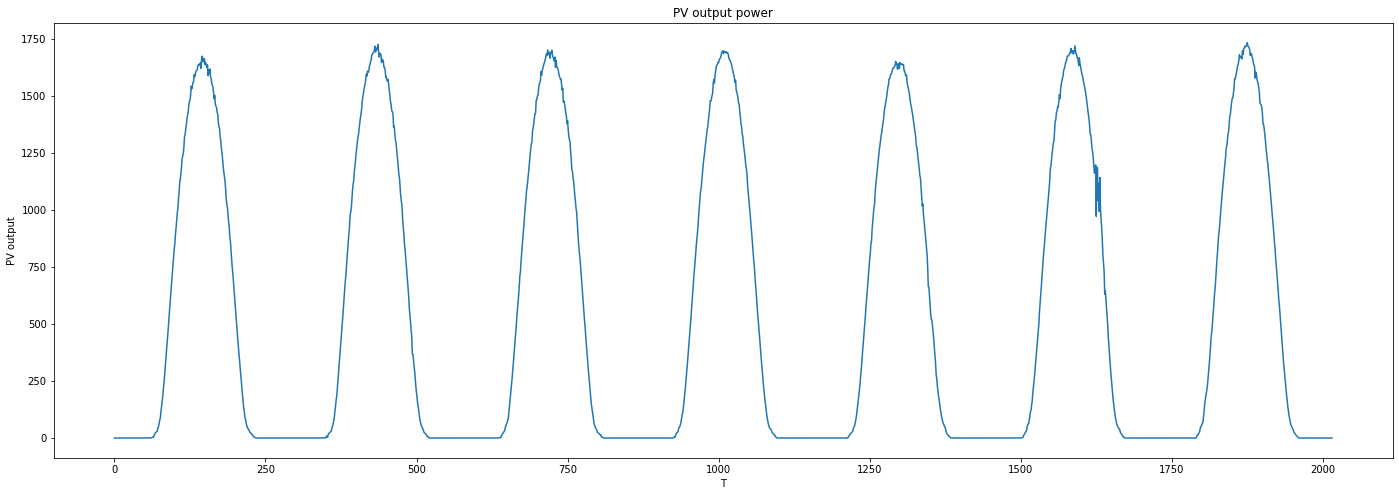

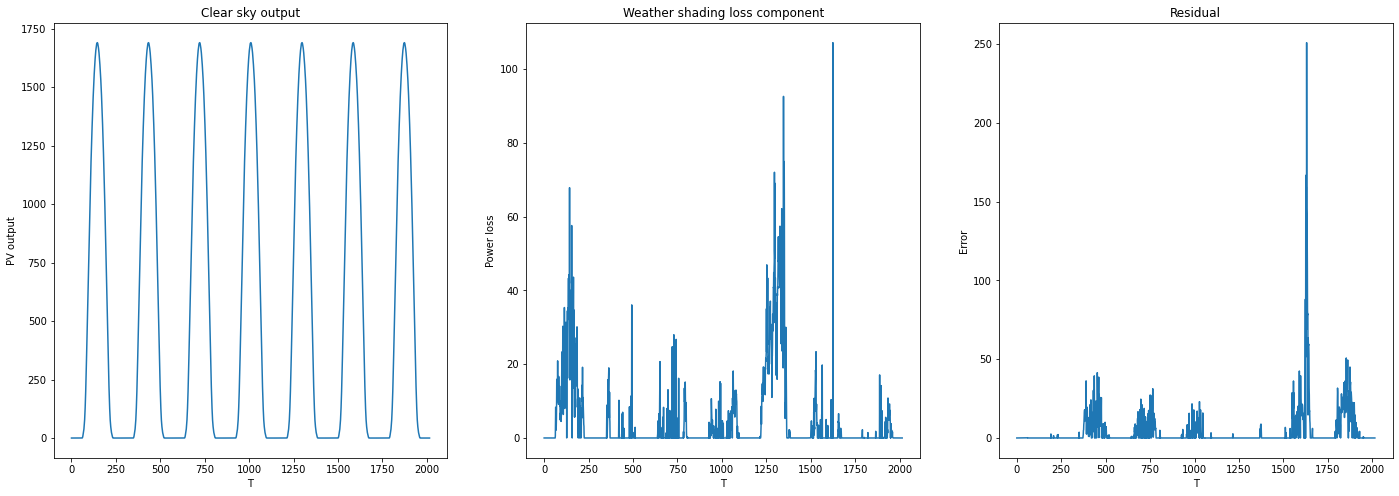

In [8]:
plt.figure(figsize=(24, 8))
plt.plot(p)
plt.title("PV output power")
plt.xlabel("T")
plt.ylabel("PV output");

plt.figure(figsize=(24, 8))
plt.subplot(1, 3, 1)
plt.plot(C.value)
plt.title("Clear sky output")
plt.xlabel("T")
plt.ylabel("PV output");

plt.subplot(1, 3, 2)
plt.plot(s.value)
plt.title("Weather shading loss component")
plt.xlabel("T")
plt.ylabel("Power loss");

plt.subplot(1, 3, 3)
plt.plot(r.value)
plt.title("Residual")
plt.xlabel("T")
plt.ylabel("Error");
plt.show()

In [9]:
print("Average value of p = %.3f"%(np.mean(p)))
print("Average value of c = %.3f"%(np.mean(C.value)))
print("Average value of s = %.3f"%(np.mean(s.value)))
print("Average value of r = %.3f"%(np.linalg.norm(r.value, 1)/T))

Average value of p = 529.038
Average value of c = 529.516
Average value of s = 4.478
Average value of r = 4.000
